# Regression Notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will analyze the Palmer Penguins dataset 

In [4]:
features = pd.read_csv("penguins_features.csv")
mass = pd.read_csv("penguins_size.csv")
mass.head(), features.head()

(  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
 0  Adelie  Torgersen              39.1             18.7              181.0   
 1  Adelie  Torgersen              39.5             17.4              186.0   
 2  Adelie  Torgersen              40.3             18.0              195.0   
 3  Adelie  Torgersen               NaN              NaN                NaN   
 4  Adelie  Torgersen              36.7             19.3              193.0   
 
    body_mass_g     sex  
 0       3750.0    MALE  
 1       3800.0  FEMALE  
 2       3250.0  FEMALE  
 3          NaN     NaN  
 4       3450.0  FEMALE  ,
   studyName  Sample Number                              Species  Region  \
 0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
 1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
 2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
 3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae

## The main goal is to predict **penguin body mass** from features such as bill length, flipper length, and species. We will start with a basic implementation of single variable regression, done with Numpy and some simple linear algebra for the closed form solution. 

In [5]:
features = features.drop('Comments', axis=1)
features = features.dropna()
mass = mass.dropna()

In [6]:
features.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

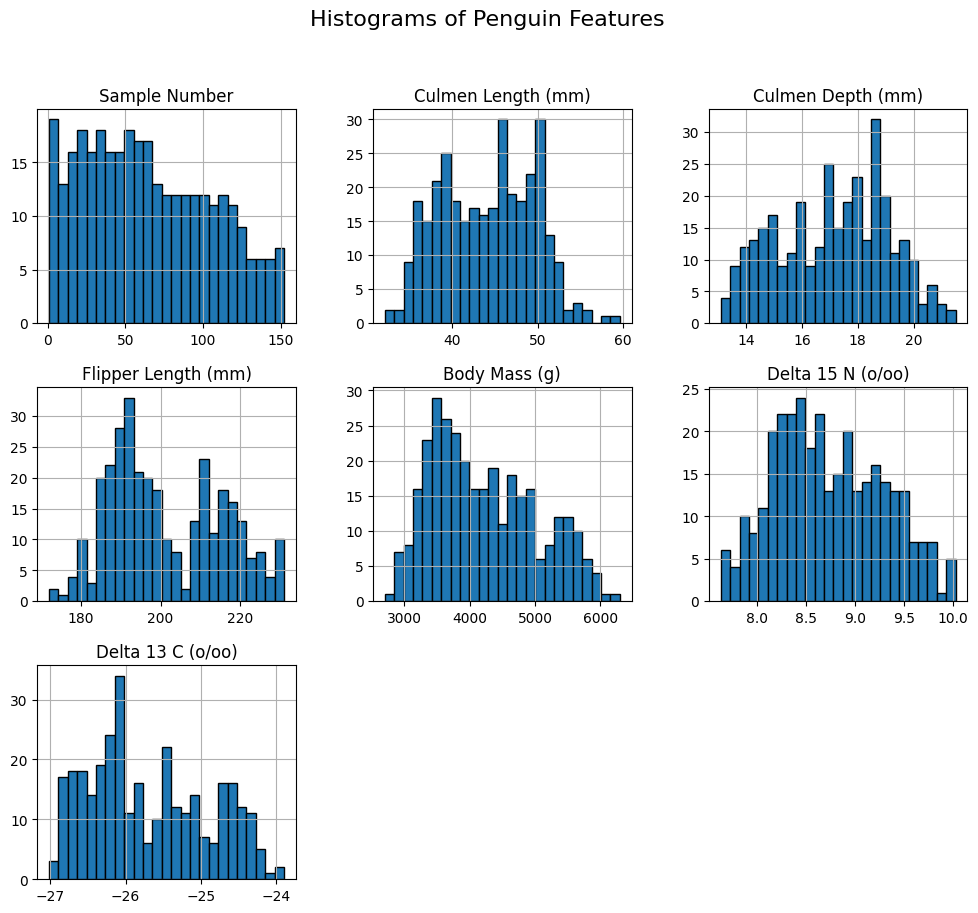

In [7]:

# Plot histograms for each numeric column
features.hist(figsize = (12,10), bins = 25, edgecolor = "black")
plt.suptitle("Histograms of Penguin Features", fontsize=16)
plt.show()


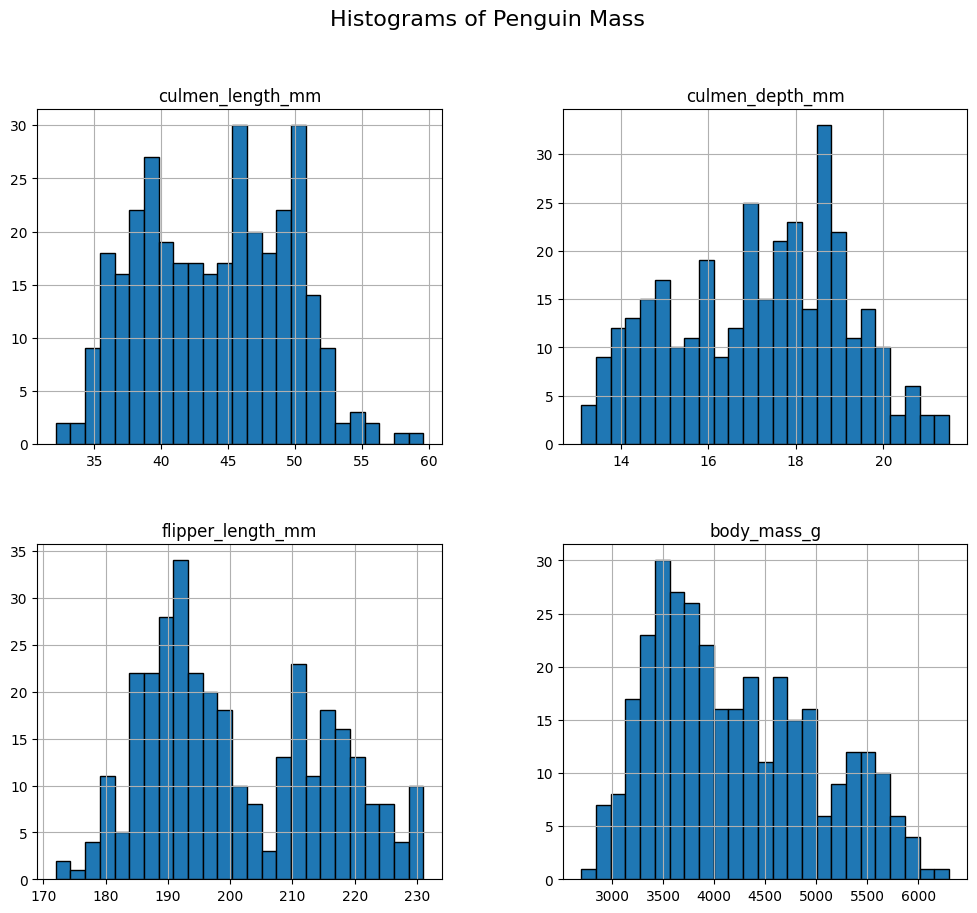

In [8]:

# Visualization

mass.hist(figsize = (12,10), bins = 25, edgecolor = "black")
plt.suptitle("Histograms of Penguin Mass", fontsize=16)
plt.show()


In [9]:
def closedFormRegression(x, y):
    # nx1 column vector
    X = x.values
    X = X.reshape(-1,1)
    Y = y.values
    Y = Y.reshape(-1,1)

    if X.shape[0] != Y.shape[0]:
        raise ValueError("Input data must have same number of entries.")
    
    # coefficients and intercept
    X = np.c_[np.ones(X.shape[0]), X] # creates a n x 2 array for multiplication
    a = np.linalg.inv(X.T @ X) @ X.T @ Y

    return a

def plotLine(x, y, a):
    plt.scatter(x, y, color="red", label='Data')
    
    xLine = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    XLine = np.c_[np.ones(xLine.shape[0]), xLine]
    yLine = XLine @ a

    plt.plot(xLine, yLine, color='blue', linewidth=2, label="Regression Line")
    plt.show()

Regression of culmen_length_mm against Body Mass: [[389.31521938]
 [ 86.82353575]]
Line Plot of culmen_length_mm against Body Mass:


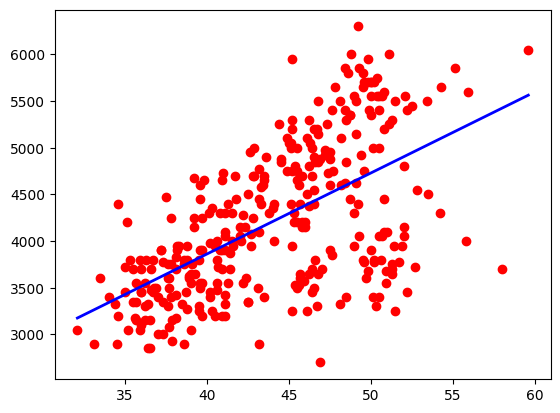

Regression of culmen_depth_mm against Body Mass: [[7528.6205304 ]
 [-193.44236464]]
Line Plot of culmen_depth_mm against Body Mass:


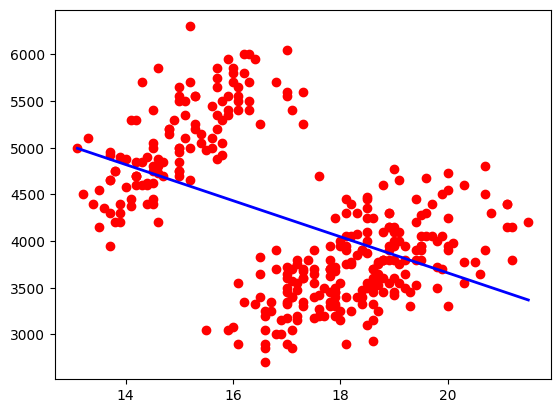

Regression of flipper_length_mm against Body Mass: [[-5865.81791722]
 [   50.12002241]]
Line Plot of flipper_length_mm against Body Mass:


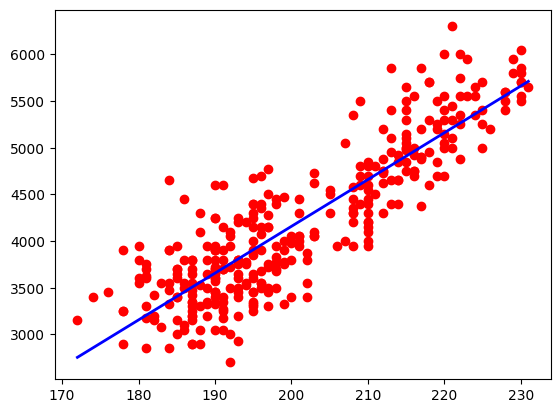

In [10]:
columns = mass.columns.values
for column in columns:
    if column != "body_mass_g" and mass[column].dtypes in ['int64', 'float64']:
        coefficients = closedFormRegression(mass[column], mass["body_mass_g"])
        print(f"Regression of {column} against Body Mass: {coefficients}")
        print(f"Line Plot of {column} against Body Mass:")
        plotLine(mass[column], mass["body_mass_g"], coefficients)

## Now, implement with sci-kit learn, still single variable, 

### imports include metrics such as r2 and accuracy (classification), key add things to note are train test splits and 

In [11]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [21]:
def regress(x, y):

    X = x.values
    X = X.reshape(-1,1)
    Y = y.values
    Y = Y.reshape(-1,1)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # output coefficients
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")

    y_mod = model.predict(X_train)
    r2_model = r2_score(y_train, y_mod)
    print(f"R-squared on Model: {r2_model}")


    # predict on test set
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    print(f"R-squared on Test Set: {r_squared}")


    
    # Scatter: training data
    plt.scatter(X_train, y_train, color="blue", label="Training Data", alpha=0.6)
    # Scatter: test data
    plt.scatter(X_test, y_test, color="green", label="Test Data", alpha=0.6)

    # Regression line (use full range of X for smooth line)
    x_line = np.linspace(min(X_train.min(), X_test.min()),
                         max(X_train.max(), X_test.max()), 100).reshape(-1,1)
    y_line = model.predict(x_line)
    
    plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression Line")

    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title("Linear Regression: Train/Test Split")
    plt.legend()
    plt.show()

    a1, a0 = float(model.coef_), float(model.intercept_)
    return a1, a0, r_squared

Coefficients: [[90.56941831]]
Intercept: [223.62200165]
R-squared on Model: 0.36271565836916586
R-squared on Test Set: 0.27464204535608494


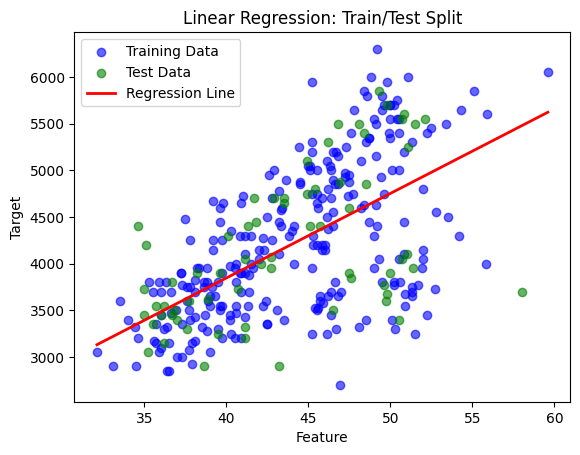

C:\Users\jaden\AppData\Local\Temp\ipykernel_15548\518222327.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a1, a0 = float(model.coef_), float(model.intercept_)


Coefficients: [[-199.20977026]]
Intercept: [7635.15438931]
R-squared on Model: 0.23783928468637183
R-squared on Test Set: 0.1597054034492824


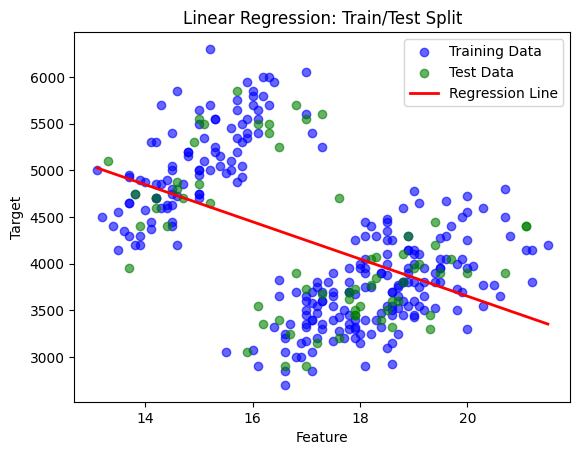

C:\Users\jaden\AppData\Local\Temp\ipykernel_15548\518222327.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a1, a0 = float(model.coef_), float(model.intercept_)


Coefficients: [[50.46746483]]
Intercept: [-5931.56327331]
R-squared on Model: 0.760412651762199
R-squared on Test Set: 0.7703835587696063


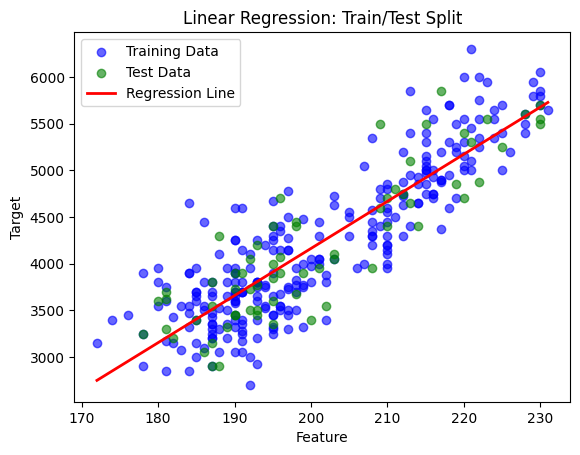

C:\Users\jaden\AppData\Local\Temp\ipykernel_15548\518222327.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a1, a0 = float(model.coef_), float(model.intercept_)


In [23]:
for column in columns:
    if column != "body_mass_g" and mass[column].dtypes in ['int64', 'float64']:
        a0, a1, r2 = regress(mass[column], mass["body_mass_g"])
        
        